In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set() # all plot will cover on seaborn style

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
df_train.shape

(188533, 13)

In [5]:
# getting descriptive stats
df_train.describe(include='all')
# use include = all for getting categorical column also.

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,188533.000000,188533,188533,188533.000000,188533.000000,183450,188533,188533,188533,188533,186081,167114,1.885330e+05
unique,NaN,57,1897,NaN,NaN,7,1117,52,319,156,2,1,NaN
top,NaN,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
freq,NaN,23088,2945,NaN,NaN,165940,3462,49904,48658,107674,144514,167114,NaN
mean,94266.000000,NaN,NaN,2015.829998,65705.295174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.387802e+04
std,54424.933488,NaN,NaN,5.660967,49798.158076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.881952e+04
min,0.000000,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03
25%,47133.000000,NaN,NaN,2013.000000,24115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+04
50%,94266.000000,NaN,NaN,2017.000000,57785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.082500e+04
75%,141399.000000,NaN,NaN,2020.000000,95400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990000e+04


In [6]:
df_train.drop('id', axis=1, inplace=True)

As we look at model column it had 1897 unique model which could make dimentionality of model very high. So we can consider dropping it later on.

# Missing Values

In [7]:
# Check the total number of missing values per column
missing_values = df_train.isnull().sum()

# Check the percentage of missing values per column
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100

# Combine both in a single DataFrame for better visualization
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Filter only the columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

# Display the result
missing_data


,Missing Values,Percentage (%)
clean_title,21419,11.360876
fuel_type,5083,2.696080
accident,2452,1.300568


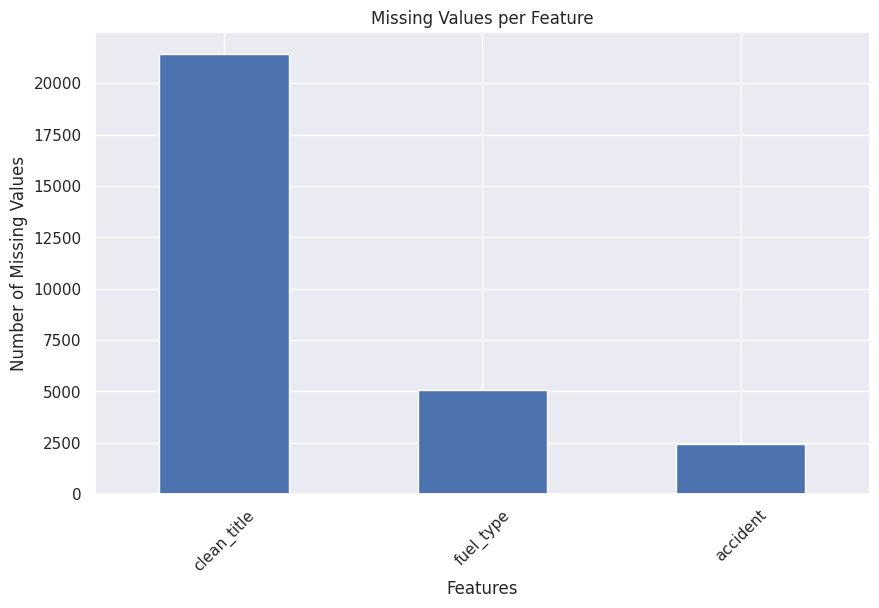

In [8]:
import matplotlib.pyplot as plt

# Plot missing values if there are any
if not missing_data.empty:
    missing_data['Missing Values'].plot(kind='bar', figsize=(10, 6))
    plt.title('Missing Values per Feature')
    plt.xlabel('Features')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No missing values found in the dataset.")


In [16]:
#dropping clean_title since it has only 1 unique value of 'Yes'
df_train.drop('clean_title', axis=1, inplace=True)

In [18]:
# For accident: fill with mode
df_train['fuel_type'].fillna(df_train['fuel_type'].mode()[0], inplace=True)
df_train['accident'].fillna(df_train['accident'].mode()[0], inplace=True)



# Check for remaining missing values in clean_title and accident

print(df_train['accident'].isnull().sum(), "missing values in 'accident'")



0 missing values in 'accident'


In [10]:
#Getting fuel_type missing value from engine column

import numpy as np

# Step 1: Get the unique fuel types (excluding NaN)
fuel_types = df_train['fuel_type'].dropna().unique()

# Step 2: Define a function to extract fuel type from the engine column
def extract_fuel_type(engine_text):
    if isinstance(engine_text, str):  # Ensure it's a string
        for fuel in fuel_types:
            if fuel.lower() in engine_text.lower():  # Case-insensitive check
                return fuel  # Return the matched fuel type
    return np.nan  # If no match found, return NaN

# Step 3: Apply this function to rows where fuel_type is missing
df_train.loc[df_train['fuel_type'].isnull(), 'fuel_type'] = df_train.loc[df_train['fuel_type'].isnull(), 'engine'].apply(extract_fuel_type)

# Step 4: Check the result
print(df_train['fuel_type'].isnull().sum(), "missing values remaining in 'fuel_type' after extraction")


0 missing values remaining in 'fuel_type' after extraction


In [19]:
# Check missing values for all columns
missing_values = df_train.isnull().sum()

# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display the result
if not missing_values.empty:
    print("Columns with missing values:\n", missing_values)
else:
    print("No missing values left in the dataset!")


No missing values left in the dataset!


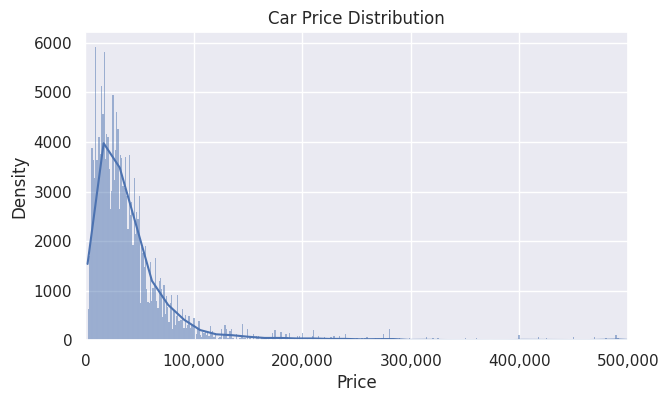

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(7,4))

# Plot the price distribution
sns.histplot(df_train['price'], kde=True)

# Find the maximum price
max_price = df_train['price'].max()

# Set x-axis limit: Use min(max_price, 500000) to avoid extreme outliers
plt.xlim(0, min(max_price, 500000))

# Format the x-axis labels to show full numbers (not scientific notation)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Titles and labels
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()


# Dealing with outliers

In [29]:
# Remove the top 1% of prices
threshold = df_train['price'].quantile(0.99)
df_train2 = df_train[df_train['price'] <= threshold]

print("Dataset size after removing top 1% highest prices:", df_train.shape)


Dataset size after removing top 1% highest prices: (186693, 11)


In [32]:
df_train2.describe()

,model_year,milage,price
count,184850.000000,184850.000000,184850.000000
mean,2015.761390,66612.226584,37210.758566
std,5.660615,49746.241904,28660.390606
min,1974.000000,100.000000,2000.000000
25%,2013.000000,25000.000000,16900.000000
50%,2017.000000,59000.000000,30000.000000
75%,2020.000000,96000.000000,47999.000000
max,2024.000000,405000.000000,187900.000000


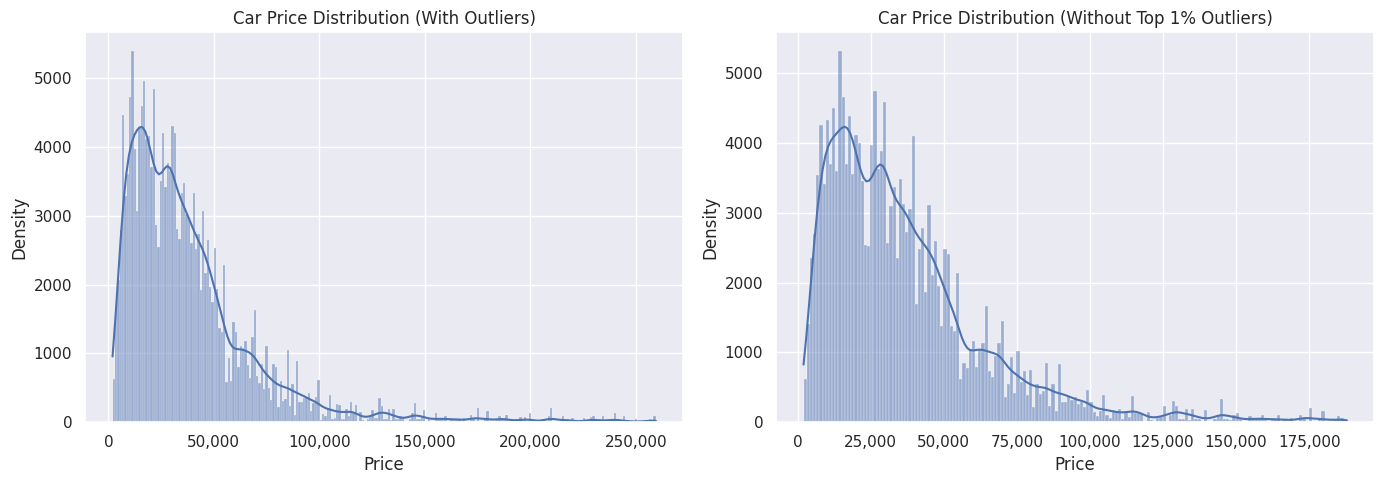

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# 🔹 Before Removing Outliers
sns.histplot(df_train['price'], kde=True, ax=axes[0])
axes[0].set_title("Car Price Distribution (With Outliers)")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Density")
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 🔹 After Removing Outliers
sns.histplot(df_train2['price'], kde=True, ax=axes[1])
axes[1].set_title("Car Price Distribution (Without Top 1% Outliers)")
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Density")
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the plots
plt.tight_layout()
plt.show()


  Now we can see that price is more generalized.

<AxesSubplot:xlabel='model_year', ylabel='Density'>

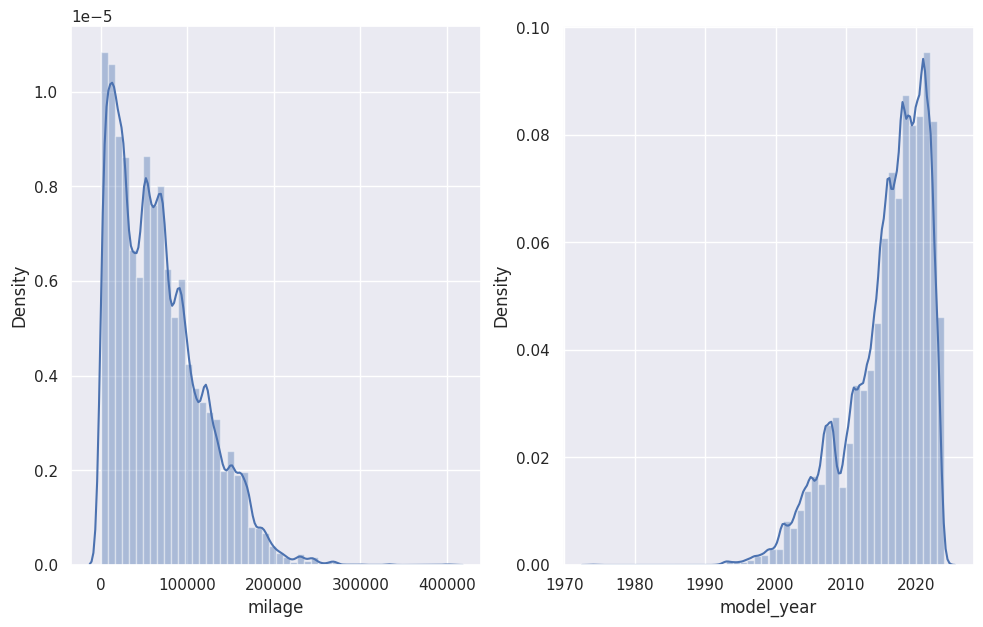

In [34]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.distplot(df_train['milage']);

plt.subplot(1,3,2)
sns.distplot(df_train['model_year'])


In [37]:
# Define 99th percentile thresholds
milage_threshold = df_train['milage'].quantile(0.99)
model_year_threshold = df_train['model_year'].quantile(0.99)

# Create a new DataFrame without the top 1% extreme values
df_train_filtered = df_train[
    (df_train['milage'] <= milage_threshold) & 
    (df_train['model_year'] <= model_year_threshold)
]

# Print the new dataset size
print("Original dataset size:", df_train.shape)
print("New dataset size after removing top 1% outliers:", df_train_filtered.shape)

# Print threshold values to see the cut-off point
print(f"99th percentile threshold for milage: {milage_threshold}")
print(f"99th percentile threshold for model_year: {model_year_threshold}")


Original dataset size: (186693, 11)
New dataset size after removing top 1% outliers: (184706, 11)
99th percentile threshold for milage: 201509.0
99th percentile threshold for model_year: 2023.0


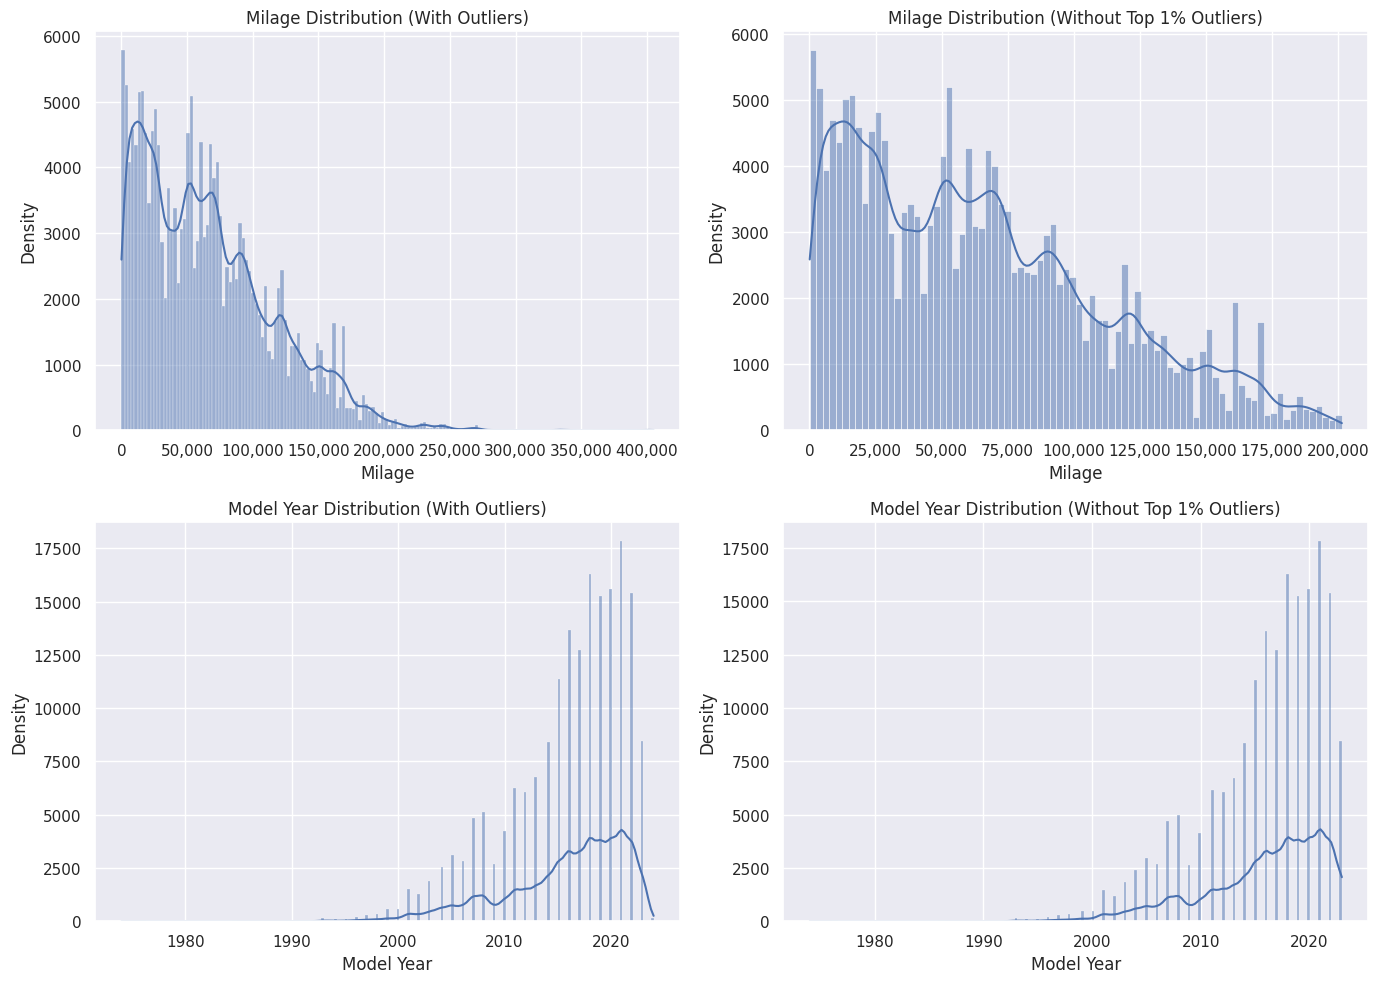

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Create a figure with two rows (for milage and model_year) and two columns (with & without outliers)
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 🔹 Milage Distribution (Before Removing Outliers)
sns.histplot(df_train['milage'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Milage Distribution (With Outliers)")
axes[0, 0].set_xlabel("Milage")
axes[0, 0].set_ylabel("Density")
axes[0, 0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 🔹 Milage Distribution (After Removing Outliers)
sns.histplot(df_train_filtered['milage'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Milage Distribution (Without Top 1% Outliers)")
axes[0, 1].set_xlabel("Milage")
axes[0, 1].set_ylabel("Density")
axes[0, 1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 🔹 Model Year Distribution (Before Removing Outliers)
sns.histplot(df_train['model_year'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Model Year Distribution (With Outliers)")
axes[1, 0].set_xlabel("Model Year")
axes[1, 0].set_ylabel("Density")

# 🔹 Model Year Distribution (After Removing Outliers)
sns.histplot(df_train_filtered['model_year'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Model Year Distribution (Without Top 1% Outliers)")
axes[1, 1].set_xlabel("Model Year")
axes[1, 1].set_ylabel("Density")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [39]:
df_train_filtered

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500
5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,29950
...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,27500
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,30000
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,86900
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,84900


In [41]:
# reset the indexes
df_train_clean = df_train_filtered.reset_index(drop=True)


df_train_clean.describe(include = 'all')

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
count,184706,184706,184706.000000,184706.000000,184706,184706,184706,184706,184706,184706,184706.000000
unique,57,1897,NaN,NaN,7,1117,52,319,156,2,NaN
top,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,NaN
freq,22582,2878,NaN,NaN,167590,3417,48738,47774,106032,143991,NaN
mean,NaN,NaN,2015.872874,64543.598714,NaN,NaN,NaN,NaN,NaN,NaN,39235.751183
std,NaN,NaN,5.590615,47011.655291,NaN,NaN,NaN,NaN,NaN,NaN,33897.718421
min,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000
25%,NaN,NaN,2013.000000,24500.000000,NaN,NaN,NaN,NaN,NaN,NaN,17000.000000
50%,NaN,NaN,2017.000000,57690.000000,NaN,NaN,NaN,NaN,NaN,NaN,30500.000000
75%,NaN,NaN,2020.000000,94500.000000,NaN,NaN,NaN,NaN,NaN,NaN,49000.000000


In [43]:
df_train.shape[0] - df_train_clean.shape[0]

1987

Total of 1987 rows were removed from the original dataset. 

In [46]:
# saving the data

df_train_clean.to_csv('Car_cleaned_train.csv', index=False)
print('Data Saved')

Data Saved
